![lcu.jpeg](lcu.jpeg)


In [1]:
import pennylane as qml
import numpy as np

H = 0.5 * qml.PauliX(0) + 0.5j * qml.PauliY(0)

qml.matrix(H)

array([[0.+0.j, 1.+0.j],
       [0.+0.j, 0.+0.j]])

(<Figure size 800x300 with 1 Axes>, <Axes: >)

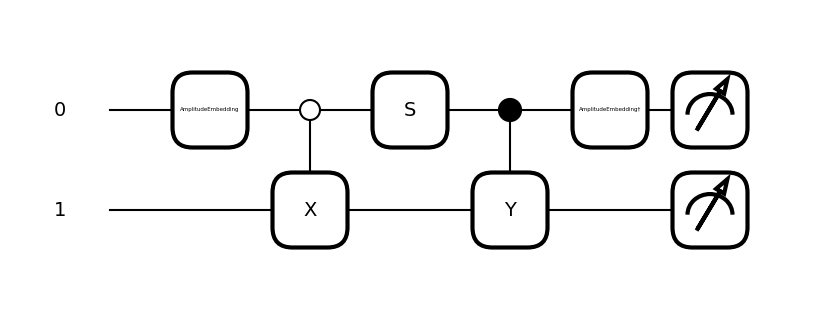

In [9]:
coeffs = np.array([0.5, 0.5])
coeffs_sqrt = np.sqrt(coeffs)

dev = qml.device("default.qubit", wires = 2)

@qml.qnode(dev)
def circuit():
    
    qml.AmplitudeEmbedding(coeffs_sqrt, normalize = True, pad_with = 0,  wires = 0)
    qml.ctrl(qml.PauliX, control = 0, control_values = [0])(wires = 1)
    qml.S(wires = 0)
    qml.ctrl(qml.PauliY, control = 0, control_values = [1])(wires = 1)
    qml.adjoint(qml.AmplitudeEmbedding)(coeffs_sqrt, normalize = True, pad_with = 0,  wires = 0)
    
    return qml.state()

qml.draw_mpl(circuit)()
    

In [12]:
print(np.round(qml.matrix(circuit)(),2))

[[ 0.+0.j  1.+0.j  0.+0.j -0.+0.j]
 [-0.+0.j  0.+0.j -1.+0.j  0.+0.j]
 [ 0.+0.j -0.+0.j  0.+0.j  1.+0.j]
 [-1.+0.j  0.+0.j  0.+0.j  0.+0.j]]


In [8]:
qml.matrix(qml.S)(wires = 0)

array([[1.+0.j, 0.+0.j],
       [0.+0.j, 0.+1.j]])